In [2]:
# This script is to help get plots from bag info
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# b1 = bagreader('/home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-34-22.bag')
# b2 = bagreader('/home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-35-39.bag')
# b3 = bagreader('/home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-37-04.bag')

b1 = bagreader('C:/Users/danie/OneDrive/Documents/School/bellows_ik/rosbag_info/2022-12-06-10-34-22.bag')
b2 = bagreader('C:/Users/danie/OneDrive/Documents/School/bellows_ik/rosbag_info/2022-12-06-10-35-39.bag')
b3 = bagreader('C:/Users/danie/OneDrive/Documents/School/bellows_ik/rosbag_info/2022-12-06-10-37-04.bag')

b = [b1, b2, b3]

[INFO]  Data folder C:/Users/danie/OneDrive/Documents/School/bellows_ik/rosbag_info/2022-12-06-10-34-22 already exists. Not creating.
[INFO]  Data folder C:/Users/danie/OneDrive/Documents/School/bellows_ik/rosbag_info/2022-12-06-10-35-39 already exists. Not creating.
[INFO]  Data folder C:/Users/danie/OneDrive/Documents/School/bellows_ik/rosbag_info/2022-12-06-10-37-04 already exists. Not creating.


In [6]:
b1.topic_table # to see all of the topics in the bag file
# We want to create a plot for error in end effector position so we are only interested in:
    # /goal_position
    # /current_position

,Topics,Types,Message Count,Frequency
0,/current_position,geometry_msgs/Point,3596,198.782180
1,/diagnostics,diagnostic_msgs/DiagnosticArray,42,0.998691
2,/goal_position,geometry_msgs/Point,9733,200.071742
3,/joy,sensor_msgs/Joy,771,243.996742
4,/robo_0/joint_0/angle_state,sensor_msgs/JointState,24335,503.034781
5,/robo_0/joint_0/joint_cmd,sensor_msgs/JointState,542,24.007235
6,/robo_0/joint_0/pressure_command,rad_msgs/PressureStamped,4888,100.023943
7,/robo_0/joint_0/pressure_state,rad_msgs/PressureStamped,18669,361.702656
8,/robo_0/joint_1/angle_state,sensor_msgs/JointState,24335,503.336613
9,/robo_0/joint_1/joint_cmd,sensor_msgs/JointState,542,24.078902


In [38]:
GOAL_MSG = []
CURRENT_MSG = []

# Get the goal positions and the current positions for each bag file
for bag in b:
    GOAL_MSG.append(bag.message_by_topic("/goal_position"))
    CURRENT_MSG.append(bag.message_by_topic("/current_position"))


In [192]:
def plot_df(df, ylabel='Error (m)'):
    fig, ax = bagpy.create_fig(1)
    ax[0].scatter(x='Time', y='x', data=df)
    ax[0].scatter(x='Time', y='y', data=df)
    ax[0].scatter(x='Time', y='z', data=df)
    ax[0].legend()
    ax[0].set(xlabel='Time (s)', ylabel=ylabel)

    plt.show()

In [40]:
goal_df = []
current_df= []
# Convert messages into data frames in pandas
for i in range(len(b)):
    goal_df.append(pd.read_csv(GOAL_MSG[i]))
    current_df.append(pd.read_csv(CURRENT_MSG[i]))


In [ ]:
# First data set
goal_df1 = goal_df[0]
current_df1 = current_df[0]

# Get the time to start at 15 s for both data_frames
goal_df1['Time'] = goal_df1['Time'].subtract(goal_df1['Time'].iat[0] + 15)

current_df1['Time'] = current_df1['Time'].subtract(current_df1['Time'].iat[0] + 15)

# make goal and current df the same size
smaller_current_df1 = current_df1[3001:]

smaller_goal_df1 = goal_df1[3029:]
smaller_goal_df1 = smaller_goal_df1[::11]
smaller_goal_df1 = smaller_goal_df1[:-15]

smaller_goal_df1.reset_index(inplace = True, drop = True)
smaller_current_df1.reset_index(inplace = True, drop = True)

error_df = smaller_goal_df1.subtract(smaller_current_df1)
error_df['Time'] = smaller_goal_df1['Time']

plot_df(error_df)


In [ ]:
# Second data set
goal_df2 = goal_df[1]
current_df2 = current_df[1]

# Get the time to start at 12 s for both data_frames (when something interesting starts to happen)
goal_df2['Time'] = goal_df2['Time'].subtract(goal_df2['Time'].iat[0] + 12)

current_df2['Time'] = current_df2['Time'].subtract(current_df2['Time'].iat[0] + 12)


# make goal and current df the same size
smaller_current_df2 = current_df2[2462:]
smaller_current_df2 = smaller_current_df2[::2]
smaller_current_df2 = smaller_current_df2[:-12]

smaller_goal_df2 = goal_df2[2442:]
smaller_goal_df2 = smaller_goal_df2[::12]

smaller_goal_df2.reset_index(inplace = True, drop = True)
smaller_current_df2.reset_index(inplace = True, drop = True)

error_df2 = smaller_goal_df2.subtract(smaller_current_df2)
error_df2['Time'] = smaller_goal_df2['Time']

plot_df(error_df2)
# smaller_goal_df2


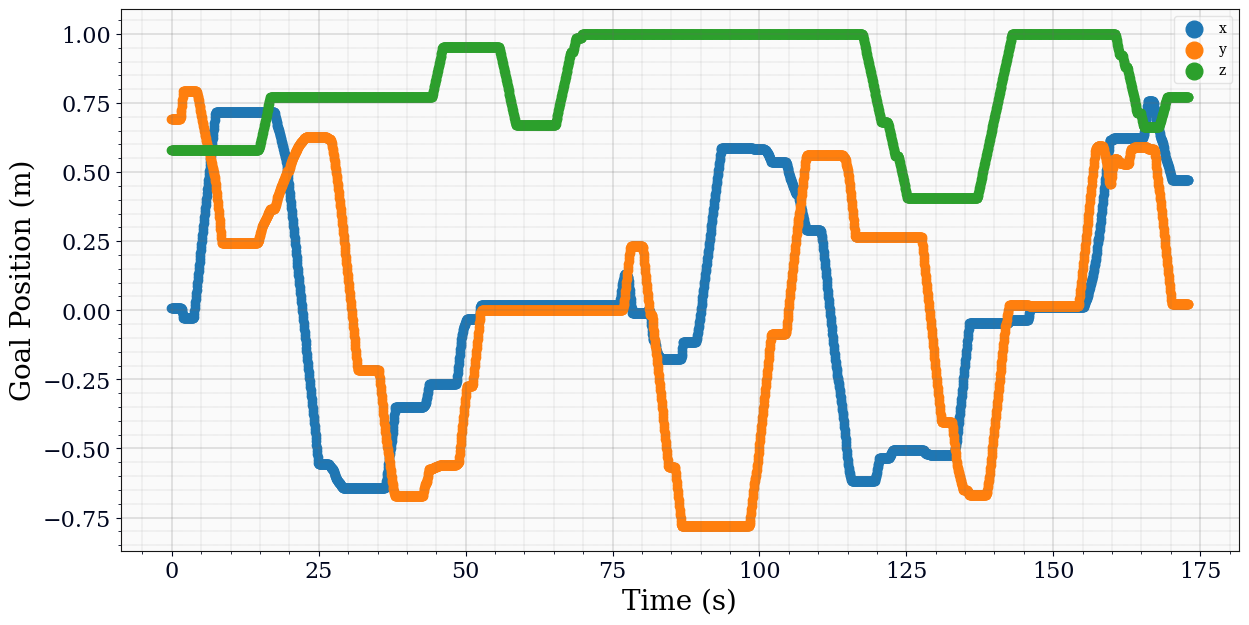

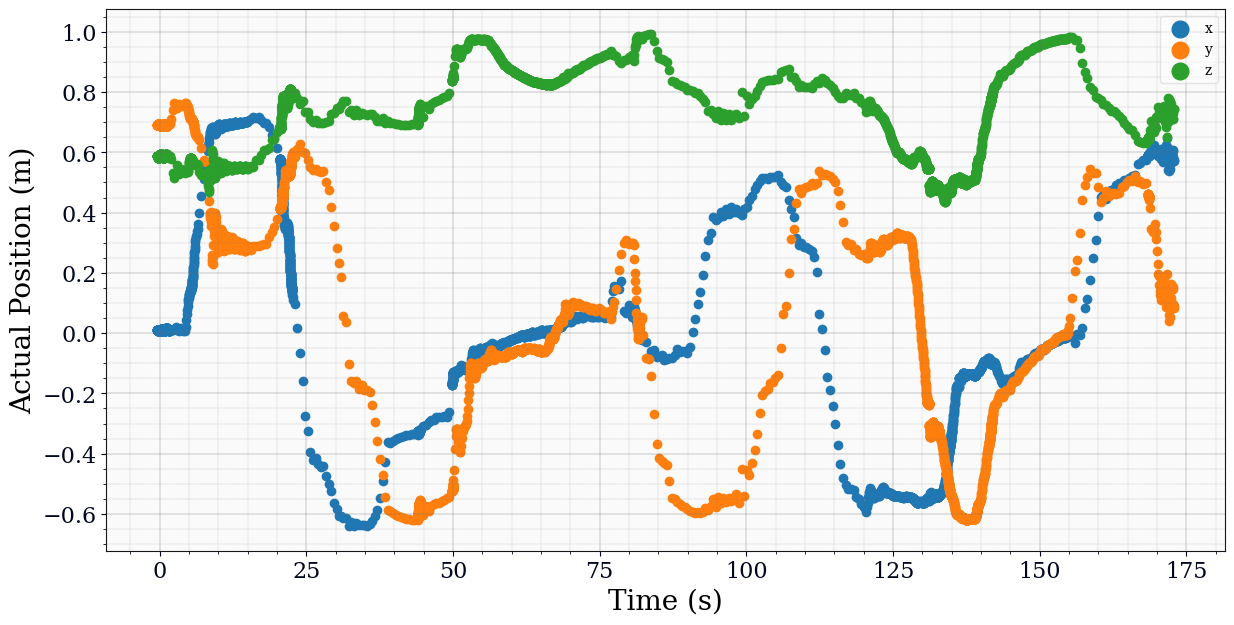

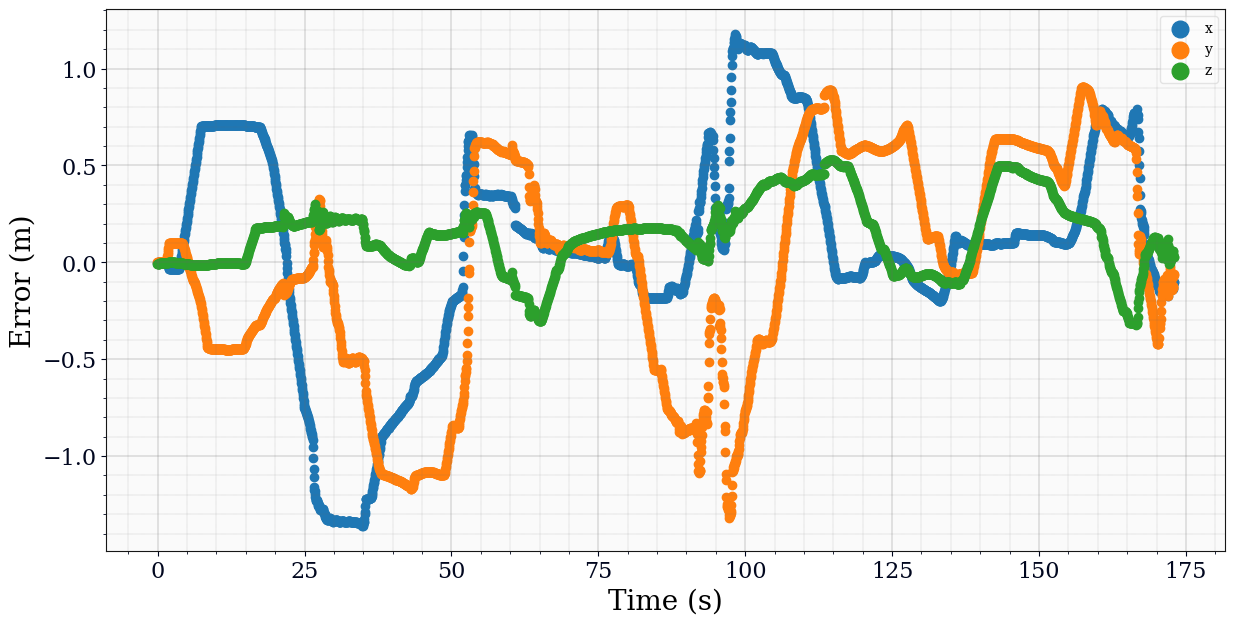

,Time,x,y,z
0,-0.060587,0.008666,0.693479,0.581107
1,-0.010640,0.008666,0.693479,0.581107
2,0.044460,0.008666,0.693479,0.581107
3,0.099392,0.008666,0.693479,0.581107
4,0.154438,0.008666,0.693479,0.581107
...,...,...,...,...
3152,172.779461,0.471801,0.023000,0.772038
3153,172.834370,0.471801,0.023000,0.772038
3154,172.889353,0.471801,0.023000,0.772038
3155,172.944359,0.471801,0.023000,0.772038


In [193]:
# Second data set
goal_df3 = goal_df[2]
current_df3 = current_df[2]

# Get the time to start at 5 s for both data_frames (when something interesting starts to happen)
goal_df3['Time'] = goal_df3['Time'].subtract(goal_df3['Time'].iat[0] + 9)

current_df3['Time'] = current_df3['Time'].subtract(current_df3['Time'].iat[0] + 9)

# # make goal and current df the same size
smaller_current_df3 = current_df3[1700:]

# print(dataframe.drop(['item-2','item-4']))

smaller_goal_df3 = goal_df3[1800:]
keep_idx = list(np.linspace(0, smaller_goal_df3.shape[0]-1, smaller_current_df3.shape[0], dtype=int))
smaller_goal_df3.reset_index(inplace = True, drop = True)
smaller_goal_df3 = smaller_goal_df3.loc[keep_idx]

smaller_goal_df3.reset_index(inplace = True, drop = True)
smaller_current_df3.reset_index(inplace = True, drop = True)

error_df3 = smaller_goal_df3.subtract(smaller_current_df3)
error_df3['Time'] = smaller_goal_df3['Time']
plot_df(smaller_goal_df3, "Goal Position (m)")
plot_df(smaller_current_df3, "Actual Position (m)")
plot_df(error_df3)

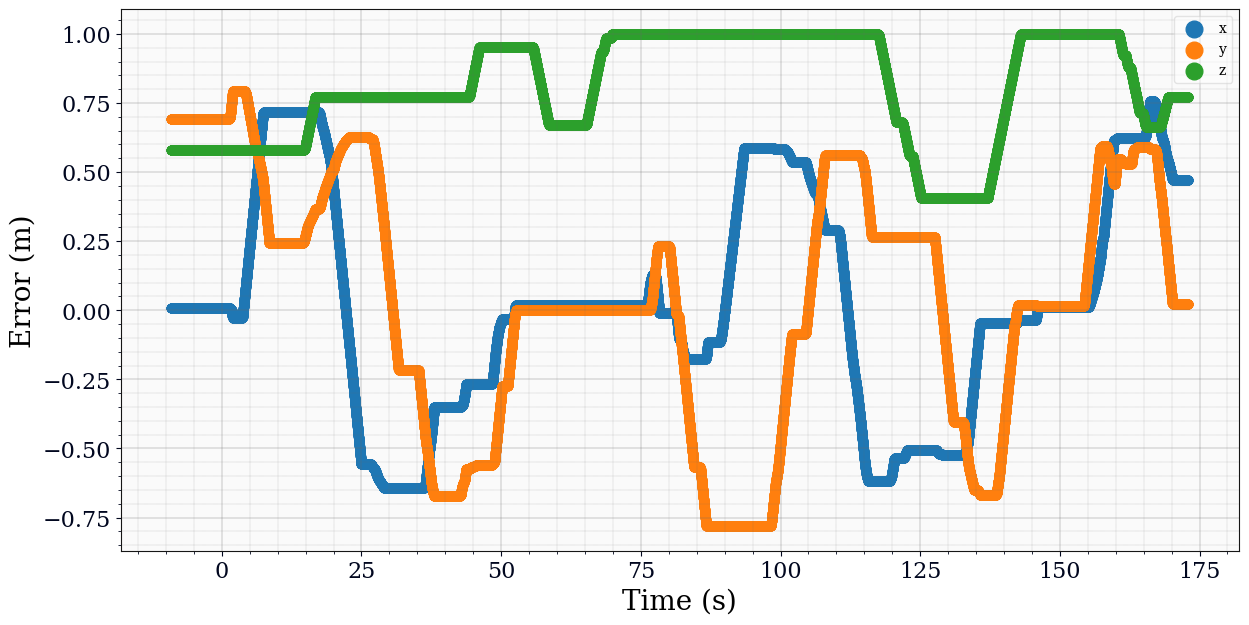

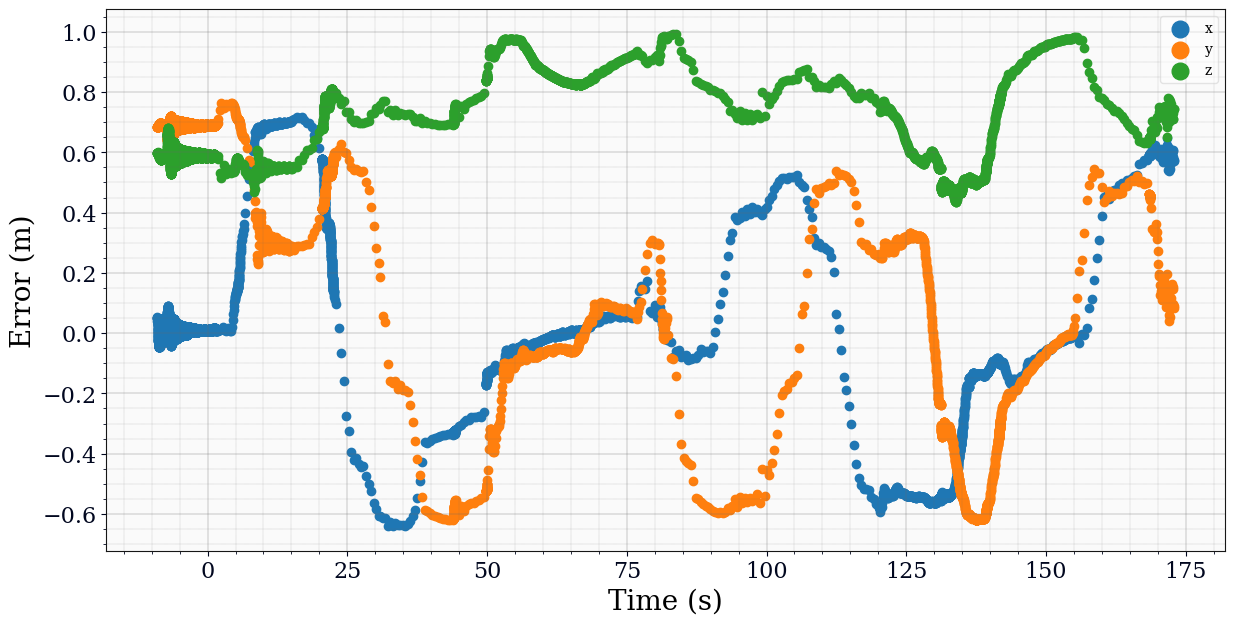

In [144]:
plot_df(goal_df3)
plot_df(current_df3)

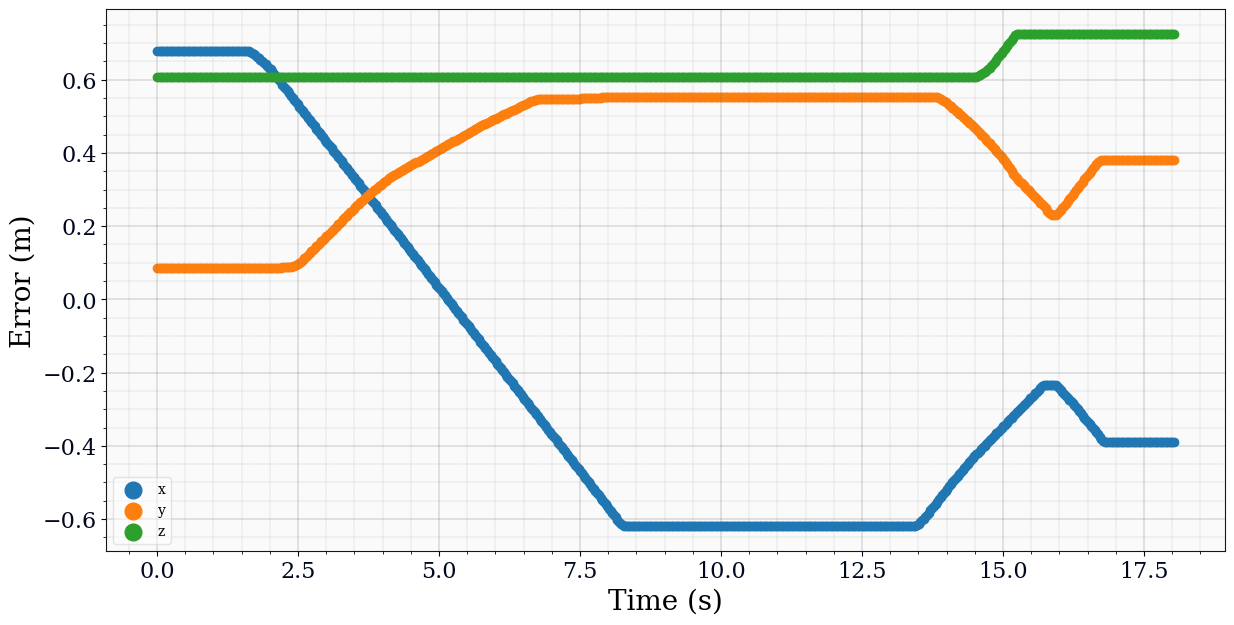

In [91]:
# plot_df(goal_df2)
plot_df(smaller_goal_df2)